In [1]:
import warnings
warnings.filterwarnings('ignore')
# We import all our dependencies.
import torch
import sys
import os
sys.path.append('../../../')
sys.path.append('/home/sheida.rahnamai/GIT/HDN/')
import tifffile as tiff
import numpy as np
import glob

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

data_dir="/group/jug/Sheida/pancreatic beta cells/download/"
"""
Three train Images -> ['high_c1', 'high_c2', 'high_c3']
'source' is the original image
Four classes -> ['membrane_full_mask', 'nucleus_mask', 'mitochondria_mask', 'granules']
in general I want to first load these 12 ground truth and 3 original images
"""

Three_train_images = ['high_c1', 'high_c2', 'high_c3']
Four_classes = ['membrane_full_mask', 'nucleus_mask', 'granules', 'mitochondria_mask']

# Load source images
train_img_paths = [os.path.join(data_dir, img, f"{img}_source.tif") for img in Three_train_images]
train_images = {img: tiff.imread(path) for img, path in zip(Three_train_images, train_img_paths)}

# Print loaded train images paths
print("Train images loaded from paths:")
for img, path in zip(Three_train_images, train_img_paths):
    print(path)

ground_truth_images = {}
# Load ground truth images
for img in Three_train_images:
    gt_path = os.path.join(data_dir, f"combined_labels_{img}.tif")
    ground_truth_images[img] = tiff.imread(gt_path)

Train images loaded from paths:
/group/jug/Sheida/pancreatic beta cells/download/high_c1/high_c1_source.tif
/group/jug/Sheida/pancreatic beta cells/download/high_c2/high_c2_source.tif
/group/jug/Sheida/pancreatic beta cells/download/high_c3/high_c3_source.tif


In [3]:
import lib.plotting as p

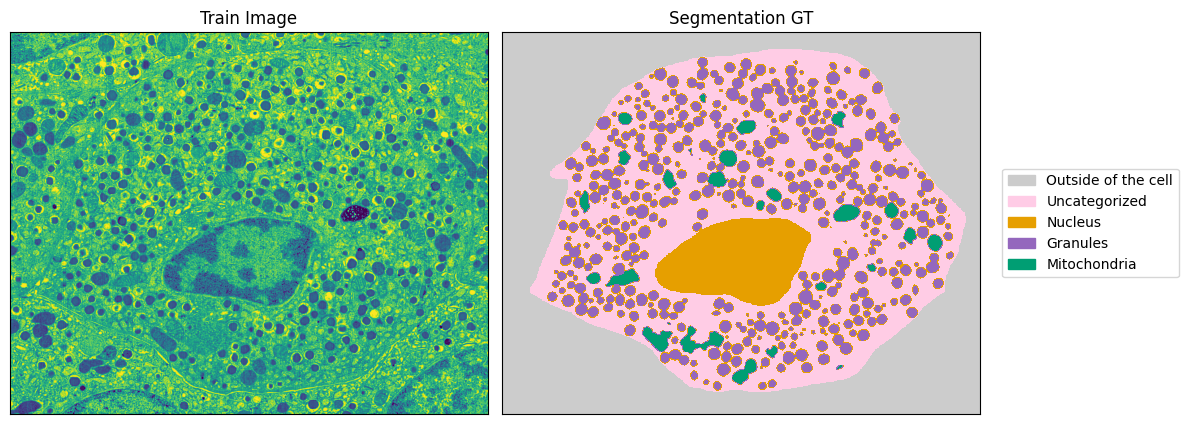

In [9]:
p.plot(
    (train_images['high_c3'][300], 'Train Image', False),
    (ground_truth_images['high_c3'][300], 'Segmentation GT', True),
    plot_types=('imshow', 'imshow_l'),
    box_size = 5
)